# Final Capstone Project

In [1]:
### Importing necessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
import string
import re
from string import punctuation
import warnings
warnings.filterwarnings('ignore') 

# Loading Cleaned Datasets

In [2]:
train_data = pd.read_csv(r'C:\Users\HP\Desktop\Digi-crome\Final_Capstone_Project\Data\cleaned_train_data.csv')
test_data = pd.read_csv(r'C:\Users\HP\Desktop\Digi-crome\Final_Capstone_Project\Data\cleaned_test_data.csv')
test_hidden_data = pd.read_csv(r'C:\Users\HP\Desktop\Digi-crome\Final_Capstone_Project\Data\cleaned_test_hidden_data.csv')

In [3]:
# Get the Shape of all datasets in one frame
train_data.shape, test_data.shape, test_hidden_data.shape

((3932, 8), (994, 7), (994, 8))

In [4]:
# Get Datasets features in one frame
train_data.columns , test_data.columns , test_hidden_data.columns

(Index(['Name of the product', 'Product Brand', 'categories',
        'primaryCategories', 'reviews_date', 'reviews_text', 'reviews_title',
        'sentiment'],
       dtype='object'),
 Index(['Name of the product', 'Product Brand', 'categories',
        'primaryCategories', 'reviews_date', 'reviews_text', 'reviews_title'],
       dtype='object'),
 Index(['Name of the product', 'Product Brand', 'categories',
        'primaryCategories', 'reviews_date', 'reviews_text', 'reviews_title',
        'sentiment'],
       dtype='object'))

In [5]:
# Get the columns_values
train_data.count()

Name of the product    3932
Product Brand          3932
categories             3932
primaryCategories      3932
reviews_date           3932
reviews_text           3932
reviews_title          3932
sentiment              3932
dtype: int64

In [6]:
# Get the columns_values
test_data.count()

Name of the product    994
Product Brand          994
categories             994
primaryCategories      994
reviews_date           994
reviews_text           994
reviews_title          994
dtype: int64

In [7]:
# Get the columns_values
test_hidden_data.count()

Name of the product    994
Product Brand          994
categories             994
primaryCategories      994
reviews_date           994
reviews_text           994
reviews_title          994
sentiment              994
dtype: int64

In [8]:
train_data.describe()

,Name of the product,Product Brand,categories,primaryCategories,reviews_date,reviews_text,reviews_title,sentiment
count,3932,3932,3932,3932,3932,3932,3932,3932
unique,23,1,23,4,630,3587,2606,3
top,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-23T00:00:00.000Z,buy kindle yr old granddaughter christmas . hu...,Great tablet,Positive
freq,667,3932,628,2561,98,4,99,3684


#   Exploratory Data Analysis (EDA):

In [9]:
train_data.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews_date,reviews_text,reviews_title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,purchase black fridaypros - great price ( even...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,purchase two amazon echo plus two dot plus fou...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,average alexa option . show things screen stil...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"good product . exactly want , good price",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,rd one 've purchase . 've buy one nieces . cas...,Very durable!,Positive


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name of the product  3932 non-null   object
 1   Product Brand        3932 non-null   object
 2   categories           3932 non-null   object
 3   primaryCategories    3932 non-null   object
 4   reviews_date         3932 non-null   object
 5   reviews_text         3932 non-null   object
 6   reviews_title        3932 non-null   object
 7   sentiment            3932 non-null   object
dtypes: object(8)
memory usage: 245.9+ KB


In [11]:
# Check the duplicate values
train_data.duplicated().sum()

2

In [12]:
# Remove duplicates
train_data = train_data.drop_duplicates()

# Get the results
train_data.duplicated().sum()

0

In [13]:
# Selecting columns necesary for sentiment analysis 
train = train_data[["reviews_text", "sentiment"]]
hidden = test_hidden_data[["reviews_text", "sentiment"]]

## Sentiment Distribution

In [14]:
# Check the exact counts of each sentiment category 
sentiment_counts = train_data['sentiment'].value_counts()
print(sentiment_counts)

sentiment
Positive    3682
Neutral      158
Negative      90
Name: count, dtype: int64


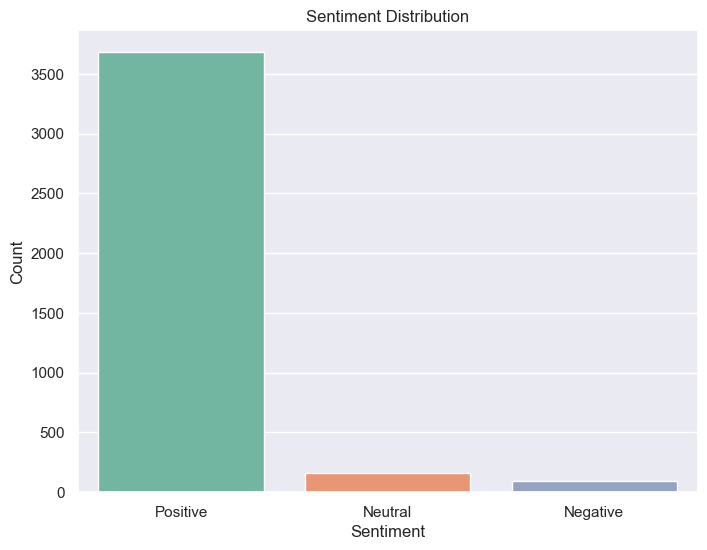

In [15]:
# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='sentiment', palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Check Class Imbalance 

In [16]:
# Get the count of each sentiment category
class_counts = train_data['sentiment'].value_counts()
print(class_counts)

sentiment
Positive    3682
Neutral      158
Negative      90
Name: count, dtype: int64


In [17]:
# Calculate class imbalance percentage
class_percentage = train_data['sentiment'].value_counts(normalize=True) * 100
print(class_percentage)

sentiment
Positive    93.689567
Neutral      4.020356
Negative     2.290076
Name: proportion, dtype: float64


<Axes: ylabel='count'>

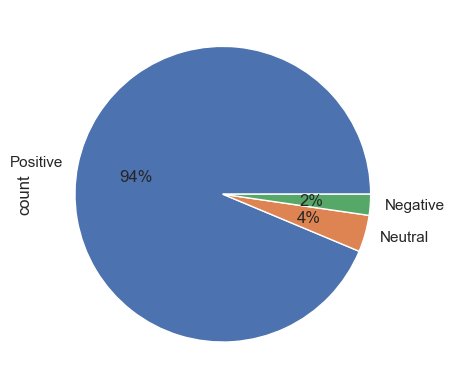

In [18]:
# Draw the Pie_plot 
train_data['sentiment'].value_counts().plot(kind='pie', autopct= '%1.0f%%')

## Bar Chart

In [19]:
# Textual Analysis for Common Words in Reviews
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance
vectorizer = CountVectorizer(stop_words='english', max_features=20)

# Fit and transform the reviews into a frequency matrix
X = vectorizer.fit_transform(train_data['reviews_text'])
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

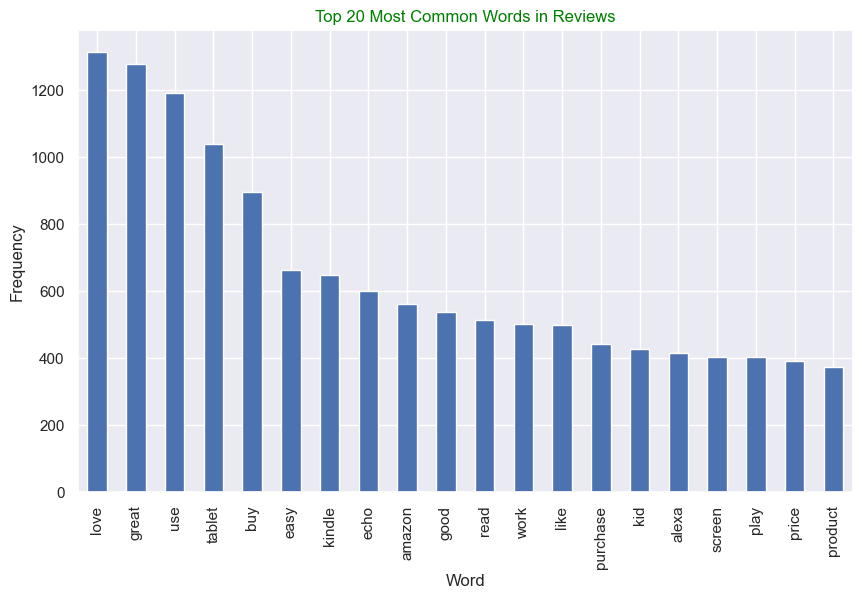

In [20]:
# Calculate word frequencies and plot the top 20 most common words
word_freq_sum = word_freq.sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
word_freq_sum.head(20).plot(kind='bar')
plt.title('Top 20 Most Common Words in Reviews', color='green')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

## Sentiment Distribution by Length of Review

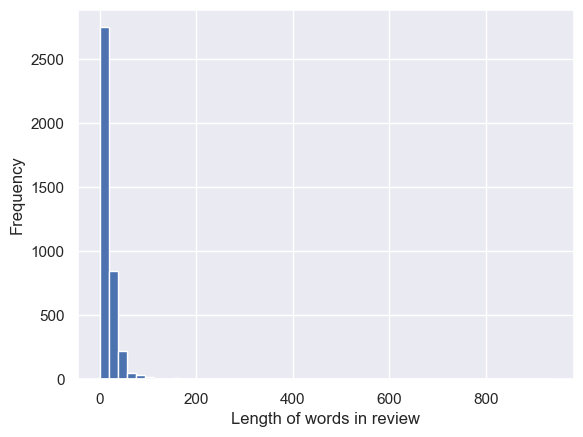

In [21]:
# Analysis of words in reviews
words_per_review = train_data["reviews_text"].apply(lambda x : len(x.split()))
words_per_review.hist(bins=50)
plt.xlabel('Length of words in review')
plt.ylabel("Frequency")
plt.show()

In [22]:
words_per_review.mean()

19.003562340966923

### Note

Each preprocessed review has an average of 19 words, and most of the reviews have less than 50 words.

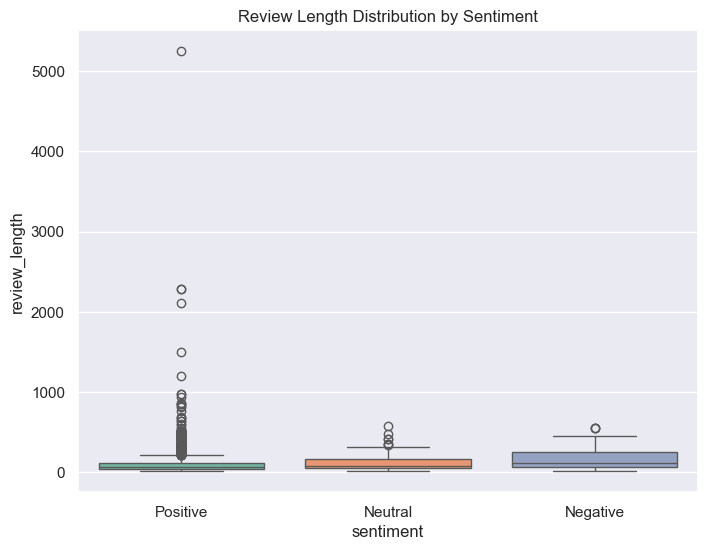

In [23]:
# Examine the distribution of review lengths for each sentiment category

# Create a new column for review length
train_data['review_length'] = train_data['reviews_text'].apply(len)

# Boxplot to show review length distribution by sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_data, x='sentiment', y='review_length', palette='Set2')
plt.title('Review Length Distribution by Sentiment')
plt.show()

## Word Cloud Analysis

In [24]:
from wordcloud import WordCloud

# Creating the word cloud for each sentiments  
positive_sentiments = train_data[train_data["sentiment"]=="Positive"]
negative_sentiments = train_data[train_data["sentiment"]=="Negative"]
neutral_sentiments= train_data[train_data["sentiment"]=="Neutral"]

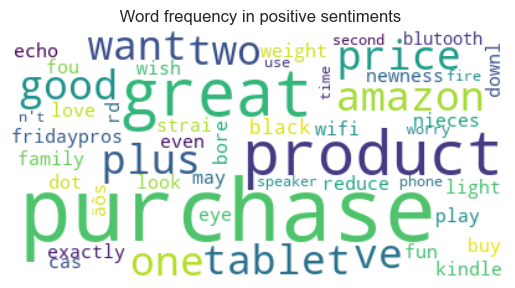

In [25]:
# Create a word cloud for positive reviews
word_cloud_text = positive_sentiments["reviews_text"]
wordcloud = WordCloud(max_words=50, background_color="white", relative_scaling = 1,).generate(str(word_cloud_text))

# Display the word cloud
plt.figure()
plt.imshow(wordcloud, interpolation= "bilinear")
plt.title(" Word frequency in positive sentiments")
plt.axis("off")
plt.show()

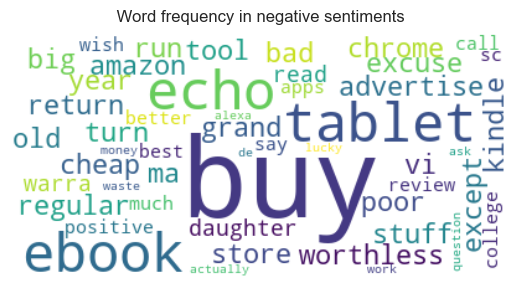

In [26]:
# Create a word cloud for Negative reviews
word_cloud_text = negative_sentiments["reviews_text"]
wordcloud = WordCloud(max_words=50, background_color="white", relative_scaling = 1,).generate(str(word_cloud_text))

# Display the word cloud
plt.figure()
plt.imshow(wordcloud, interpolation= "bilinear")
plt.title(" Word frequency in negative sentiments")
plt.axis("off")
plt.show()

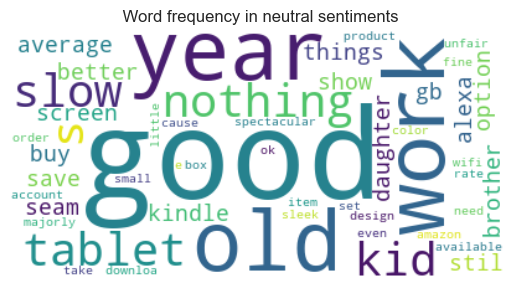

In [27]:
# Create a word cloud for Neutral reviews
word_cloud_text = neutral_sentiments["reviews_text"]
wordcloud = WordCloud(max_words=50, background_color="white", relative_scaling = 1,).generate(str(word_cloud_text))
                                           
# Display the word cloud
plt.figure()
plt.imshow(wordcloud, interpolation= "bilinear")
plt.title(" Word frequency in neutral sentiments")
plt.axis("off")
plt.show()

# Feature Engineering:

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [29]:
# Vectorization: Convert reviews_text to Tf-Idf scores
vectorizer = TfidfVectorizer()

# Fit and transform the reviews_text into a tf-idf matrix
tfidf_matrix = vectorizer.fit_transform(train_data['reviews_text'])

In [30]:
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 54356 stored elements and shape (3930, 3800)>

In [31]:
# Convert the resulting matrix to a DataFrame to view the features
tfidf_features = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [32]:
# Display the first few rows of tfidf_features
tfidf_features.head(5)

,abc,abilities,ability,able,absent,absolute,absolutely,absorb,abuse,accelerometer,...,äù,äú,äúalexa,äúbest,äúdropping,äúdual,äúshow,äúskills,äústar,äúthings
0,0.0,0.0,0.0,0.109661,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Add TF_IDF features & Back to the dataset
train_data_tfidf = pd.concat([train_data.reset_index(drop=True),tfidf_features], axis=1)

In [34]:
train_data_tfidf.head()

,Name of the product,Product Brand,categories,primaryCategories,reviews_date,reviews_text,reviews_title,sentiment,review_length,abc,...,äù,äú,äúalexa,äúbest,äúdropping,äúdual,äúshow,äúskills,äústar,äúthings
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,purchase black fridaypros - great price ( even...,Powerful tablet,Positive,282,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,purchase two amazon echo plus two dot plus fou...,Amazon Echo Plus AWESOME,Positive,403,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,average alexa option . show things screen stil...,Average,Neutral,55,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"good product . exactly want , good price",Greattttttt,Positive,40,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,rd one 've purchase . 've buy one nieces . cas...,Very durable!,Positive,98,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Classifier Selection:

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [36]:
# Step 3: Split the data into training and test sets
X_train = train_data["reviews_text"]
X_test =  test_hidden_data["reviews_text"]
y_train = train_data["sentiment"]
y_test = test_hidden_data["sentiment"]

In [37]:
# Converting reviews to vectors  using Tf-idf score
vectorizer_1 = TfidfVectorizer(ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [38]:
vectorizer_1

TfidfVectorizer(ngram_range=(1, 2))

## ML Model with imbalanced dataset

## Naive Bayes classifier

In [39]:
# Multinomial Naive Bayes classifyer with imbalanced data
mnb_model = MultinomialNB()
mnb_model.fit(tfidf_matrix.toarray(),y_train)

MultinomialNB()

In [40]:
# Model Performance (train_accuracy , test_accuracy)
train_accuracy = mnb_model.score(X_train_vec.toarray(), y_train)
test_accuracy = mnb_model.score(X_test_vec.toarray(), y_test)
print(f"MultinimialNB train score is {train_accuracy}, test score is {test_accuracy}")

MultinimialNB train score is 0.9368956743002544, test score is 0.9366197183098591


In [41]:
# Train prediction
train_predictions = mnb_model.predict(X_train_vec.toarray())
train_report = classification_report(y_train, train_predictions)
print("Train classification report\n", train_report)

Train classification report
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        90
     Neutral       0.00      0.00      0.00       158
    Positive       0.94      1.00      0.97      3682

    accuracy                           0.94      3930
   macro avg       0.31      0.33      0.32      3930
weighted avg       0.88      0.94      0.91      3930



In [42]:
# Test prediction 
test_predictions = mnb_model.predict(X_test_vec.toarray())
test_report = classification_report(y_test, test_predictions)
print('Test classification report\n', test_report)

Test classification report
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        24
     Neutral       0.00      0.00      0.00        39
    Positive       0.94      1.00      0.97       931

    accuracy                           0.94       994
   macro avg       0.31      0.33      0.32       994
weighted avg       0.88      0.94      0.91       994



In [43]:
imbalanced_test_pred = mnb_model.predict(X_test_vec.toarray())
imbalanced_test_pred[0:100]

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positi

### Observation

The bias in the dataset resulted in all predictions to be biased towards the majority class, hence there is need to balance the dataset

Failure to treat imbalanced dataset degrades the performance of the classifier model hence balancing the dataset is a necessity

# Tackling Class Imbalance:

## Checking class counts_

In [44]:
class_counts = train_data['sentiment'].value_counts()
print(class_counts)

sentiment
Positive    3682
Neutral      158
Negative      90
Name: count, dtype: int64


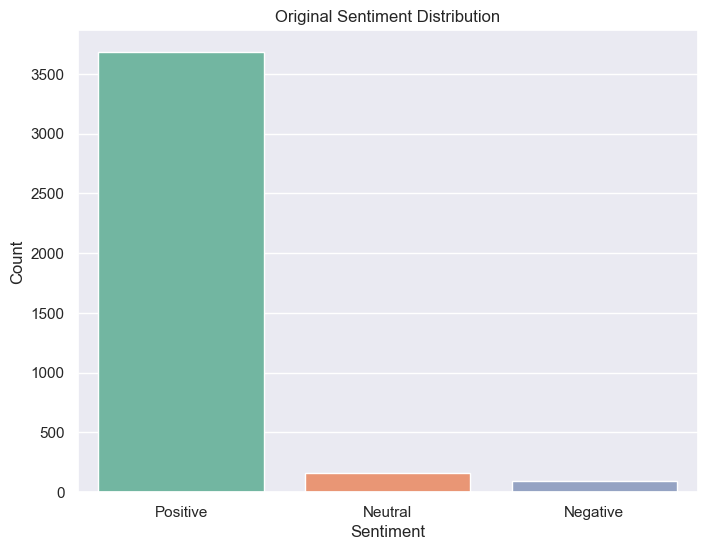

In [45]:
# Visualization original class sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='sentiment', palette='Set2')
plt.title('Original Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Addressing class imbalance with undersampling

In [46]:
# Combining smote and undersampling using SmoteTomek technique 
smote = SMOTETomek()
x_train_smote, y_train_smote = smote.fit_resample(X_train_vec, y_train)

In [47]:
smote

SMOTETomek()

### Note

Smotetomek algorithm is only applied to train data. The test data remain unchanged so that it represents the original data

In [48]:
y_train_smote.value_counts()

sentiment
Positive    3682
Neutral     3682
Negative    3682
Name: count, dtype: int64

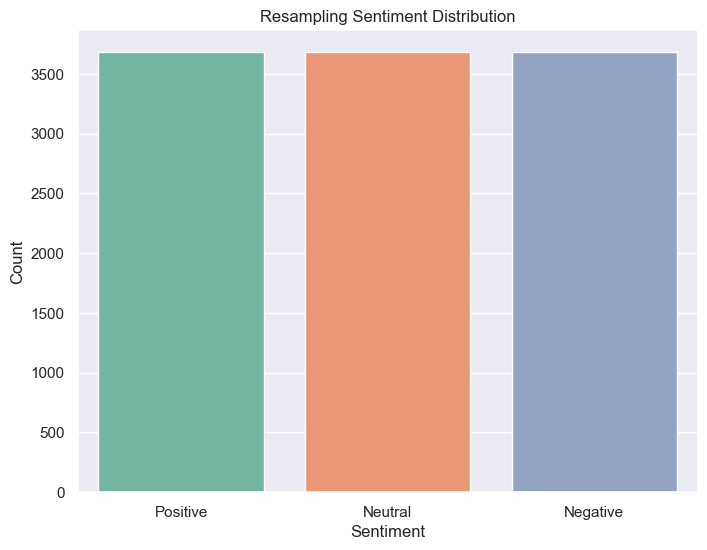

In [49]:
# Visualize the New distribution of sentiments after resampling
plt.figure(figsize=(8,6))
sns.countplot(x=y_train_smote, palette='Set2')
plt.title('Resampling Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Multinomial Naive Bayes classifyer with balanced data - SMOTTomek

In [50]:
mnb_smt_model = MultinomialNB()
mnb_smt_model.fit(x_train_smote.toarray(),y_train_smote)

# Model performance 
train_smt_accuracy = mnb_smt_model.score(x_train_smote.toarray(), y_train_smote)
test_smt_accuracy = mnb_smt_model.score(X_test_vec.toarray(), y_test)
print(f"MultinomialNB train score for smt balanced dataset is {train_smt_accuracy}, test score is {test_smt_accuracy}")

MultinomialNB train score for smt balanced dataset is 0.9668658337859859, test score is 0.8531187122736419


In [51]:
# Test prediction 
smt_test_predictions = mnb_smt_model.predict(X_test_vec.toarray())
smt_test_report = classification_report(y_test, smt_test_predictions)
print('Test classification report\n', smt_test_report)

Test classification report
               precision    recall  f1-score   support

    Negative       0.28      0.46      0.34        24
     Neutral       0.15      0.44      0.23        39
    Positive       0.97      0.88      0.92       931

    accuracy                           0.85       994
   macro avg       0.47      0.59      0.50       994
weighted avg       0.92      0.85      0.88       994



In [52]:
balanced_test_pred = mnb_smt_model.predict(X_test_vec.toarray())
balanced_test_pred[0:100]

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Neutral', 'Positive', 'Neutral', 'Positive', 'Positive',
       'Positive', 'Neutral', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Neutral', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Neutral',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Neutral', 'Positive',
       'Positive', 'Positive', 'Positive', 'Negative', 'Neutral',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
  

### Observations

Balancing the dataset enabled all the three sentiments (positive, negative and neutral) to be predicted in the model

In [76]:
from some_module import SentimentTokenizer


ModuleNotFoundError: No module named 'some_module'

In [73]:
# keras
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer

# oversampling
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'keras.preprocessing.text'

In [75]:
# creating a new tokenizer by fitting to the remaining data (data that was remaining after the test data split done before)
oversampled_tokenizer = SentimentTokenizer()
oversampled_tokenizer.fit(X_remaining)
oversampled_word_index = oversampled_tokenizer.get_word_index()
oversampled_vocabulary_size = oversampled_tokenizer.get_vocabulary_size()

X_remaining_sequences = oversampled_tokenizer.convert(X_remaining)

NameError: name 'SentimentTokenizer' is not defined

# Evaluation Metrics:

In [ ]:
# Step 3: Split the data into training and test sets
X_train = train_data["reviews_text"]
X_test =  test_hidden_data["reviews_text"]
y_train = train_data["sentiment"]
y_test = test_hidden_data["sentiment"]

# Converting reviews to vectors  using Tf-idf score
vectorizer_1 = TfidfVectorizer(ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Model Performance (train_accuracy , test_accuracy)
train_accuracy = mnb_model.score(X_train_vec.toarray(), y_train)
test_accuracy = mnb_model.score(X_test_vec.toarray(), y_test)
print(f"MultinimialNB train score is {train_accuracy}, test score is {test_accuracy}")

# Train prediction
train_predictions = mnb_model.predict(X_train_vec.toarray())
train_report = classification_report(y_train, train_predictions)
print("Train classification report\n", train_report)

# Test prediction 
test_predictions = mnb_model.predict(X_test_vec.toarray())
test_report = classification_report(y_test, test_predictions)
print('Test classification report\n', test_report)

imbalanced_test_pred = mnb_model.predict(X_test_vec.toarray())
imbalanced_test_pred[0:100]

In [69]:
# Multinomial Naive Bayes classifyer with imbalanced data
mnb_model = MultinomialNB()
mnb_model.fit(tfidf_matrix.toarray(),y_train)

y_pred = mnb_model.predict(y_test)
print(confusion_matrix(y_true=y_train, y_pred=y_test))
print(classification_report(y_true=y_val, y_pred=y_pred))
print(accuracy_score(y_val, y_pred)*100)
print(nb.score(x_train,y_train))
print(nb.score(x_val,y_val))

ValueError: could not convert string to float: 'Positive'

In [65]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(x_val)
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print(accuracy_score(y_val, y_pred)*100)
print(nb.score(x_train,y_train))
print(nb.score(x_val,y_val))

ValueError: could not convert string to float: 'purchase black fridaypros - great price ( even sale ) powerful fast quad core processors amaze soundwell builtcons -amazon ads , amazon need subsidize tablet remove add pay $ .inability access apps except ones amazon . way able accomplish add google play storenet great tablet money'

In [63]:
# Calculate Precision, Recall & F1-Score
precision = precision_score(smt_test_predictions, smt_test_report)
recall = recall_score(smt_test_predictions, smt_test_report)
f1 = f1_score(smt_test_predictions, smt_test_report)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

InvalidParameterError: The 'y_pred' parameter of precision_score must be an array-like or a sparse matrix. Got '              precision    recall  f1-score   support\n\n    Negative       0.28      0.46      0.34        24\n     Neutral       0.15      0.44      0.23        39\n    Positive       0.97      0.88      0.92       931\n\n    accuracy                           0.85       994\n   macro avg       0.47      0.59      0.50       994\nweighted avg       0.92      0.85      0.88       994\n' instead.

In [ ]:
# Test prediction 
smt_test_predictions = mnb_smt_model.predict(X_test_vec.toarray())
smt_test_report = classification_report(y_test, smt_test_predictions)
print('Test classification report\n', smt_test_report)

In [ ]:
# Step 3: Split the data into training and test sets
X_train = train_data["reviews_text"]
X_test =  test_hidden_data["reviews_text"]
y_train = train_data["sentiment"]
y_test = test_hidden_data["sentiment"]